In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
# Loading the dataset 

salary_data = pd.read_csv('C:\\Users\\admin\\Documents\\My books\\Machine Learning Pathway\\Datasets\\salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [67]:
# Checking the shape of the dataset

salary_data.shape

(30, 2)

In [68]:
# Checking for missing values

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [69]:
# Seperating the dataset into feature and target

x = salary_data.iloc[:, :-1].values  #the .values part converts the dataframe into a numpy array free from index and column names
y = salary_data.iloc[:, 1].values

print(x,'\n\n')
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 


[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(30, 1) (20, 1) (10, 1)


In [71]:
# Developing our linear regression model from scratch

class Linear_Regression():
    
    def __init__(self, learning_rate, no_of_iterations):
        # Initializing our hyperparameters
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    
    def fit(self, x, y):
        # Initializing the number of features of the dataset and the number of datapoints or samples
        self.ns, self.nf = x.shape   # This outputs a tuple with two values, so the first goes to our first variable and same with the second.
        
        # Initailizing inputs(x,y) and model parameters(weights and bias)
        self.x = x
        self.y = y
        self.w = np.zeros(self.nf) # Here, each feature should have a weight value so we asign each a value of zero(number of zeros = number of features)
        self.b = 0    # Irrespective of the number of the features in the dataset, we always have a single intercept hence our bias can take an int value

        # Implementing gradient decent
        for i in range(self.no_of_iterations):
            self.updating_parameters()

    
    def updating_parameters(self):
        # Checking the prediction of our model based on the model parameters obtained thus far
        prediction = self.predict(self.x)

        # Initiating dw and db for calculating new weights and bais of data feature(s)
        dw = -(2 * (self.x.T).dot(self.y - prediction))/self.ns
        db = -(2 * np.sum(self.y - prediction))/self.ns

        # Updating model parameter values
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    
    def predict(self, x):
        return np.dot(x,self.w) + self.b

In [72]:
# loading an instance of the model

model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [73]:
# Training our linear regression model

model.fit(x_train, y_train)

In [74]:
test_prediction = model.predict(x_test)
test_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

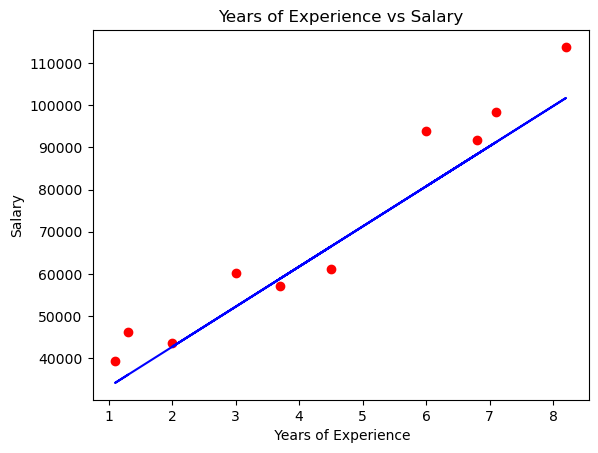

In [75]:
# Plotting the actual values and estimated values to visualize the loss function

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, test_prediction, color='blue')
plt.xlabel(' Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()